In [4]:
%pip install scikit-learn

<Figure size 1400x1000 with 0 Axes>

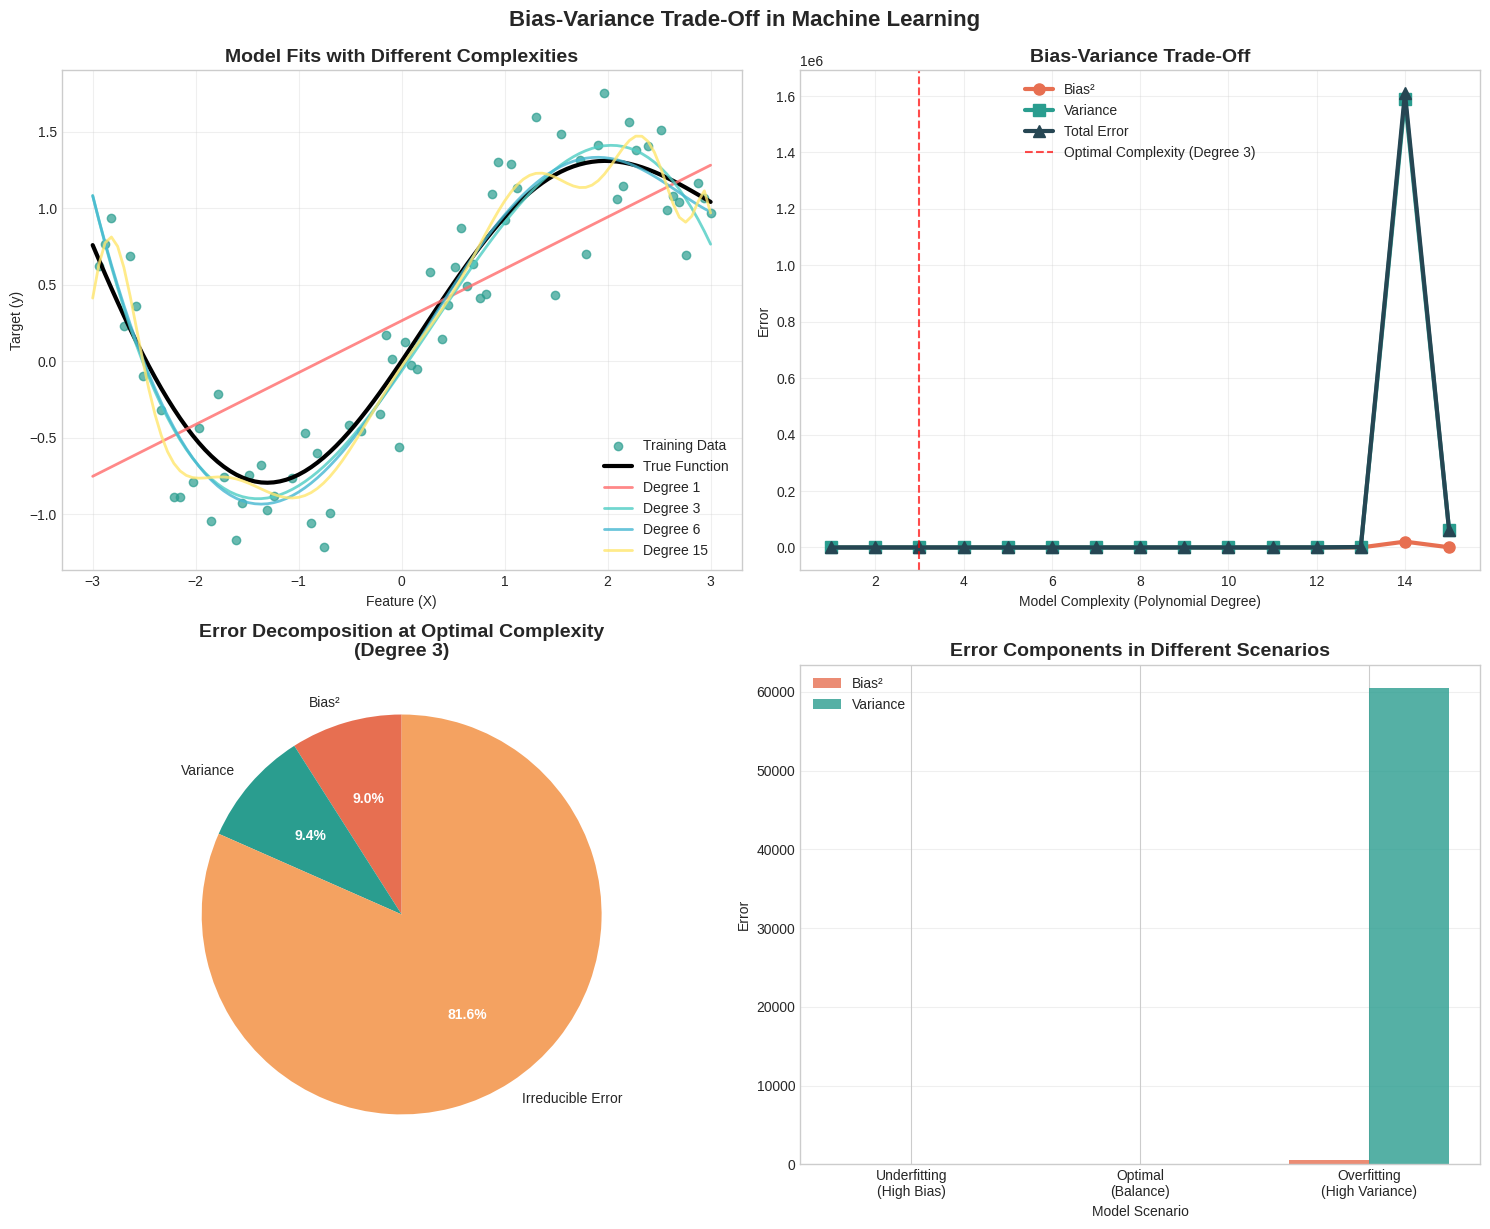

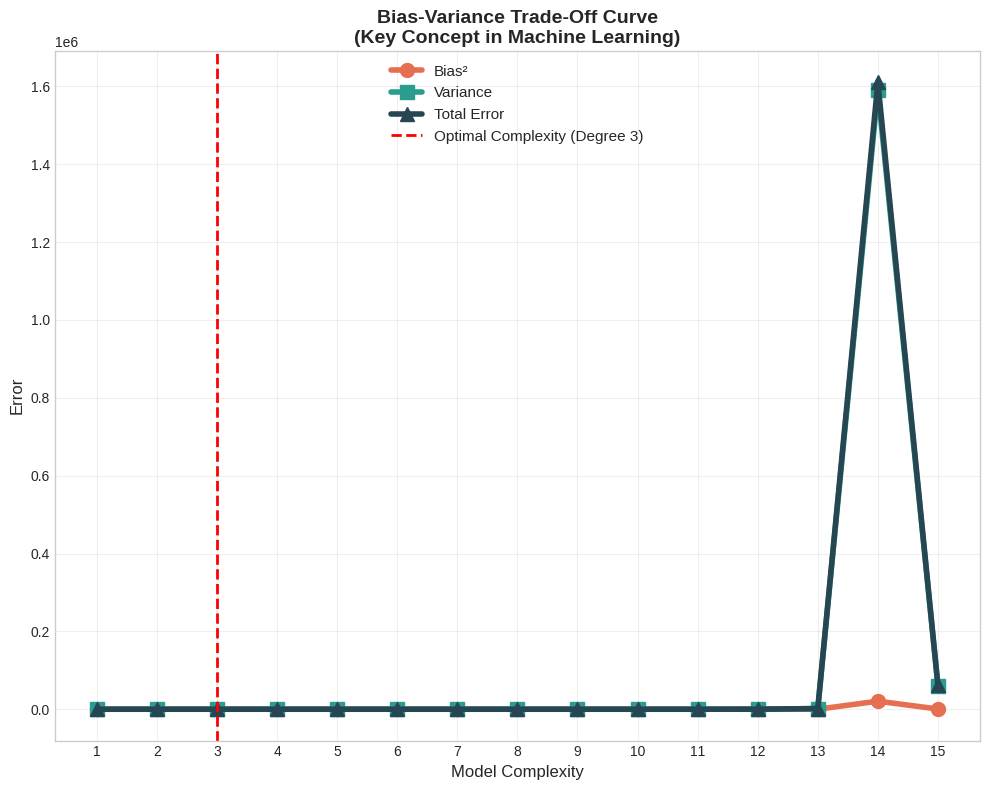

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Set up the plot
plt.figure(figsize=(14, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# Generate sample data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y_true = np.sin(X) + 0.1 * X**2
X = X.reshape(-1, 1)

# Add noise
y = y_true + np.random.normal(0, 0.3, len(X))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define polynomial degrees to test
degrees = [1, 3, 6, 15]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFE66D']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Individual model fits
ax1 = axes[0, 0]
ax1.scatter(X_train, y_train, alpha=0.7, label='Training Data', color='#2A9D8F')
ax1.plot(X, y_true, 'k-', linewidth=3, label='True Function')

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    X_train_poly = poly.transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_poly)

    ax1.plot(X, y_pred, color=colors[i], linewidth=2,
             label=f'Degree {degree}', alpha=0.8)

ax1.set_title('Model Fits with Different Complexities', fontsize=14, fontweight='bold')
ax1.set_xlabel('Feature (X)')
ax1.set_ylabel('Target (y)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Bias-Variance Trade-off Curve
ax2 = axes[0, 1]
degrees_range = np.arange(1, 16)
bias_squared = []
variance = []
total_error = []

for degree in degrees_range:
    # Multiple training sets to estimate variance
    predictions = []
    train_errors = []

    for _ in range(100):  # Multiple samples
        X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.7)
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(X_sample)
        X_full_poly = poly.transform(X)

        model = LinearRegression()
        model.fit(X_poly, y_sample)
        y_pred = model.predict(X_full_poly)
        predictions.append(y_pred)
        train_errors.append(mean_squared_error(y_sample, model.predict(X_poly)))

    predictions = np.array(predictions)
    avg_prediction = np.mean(predictions, axis=0)

    # Calculate bias^2, variance, and total error
    bias_squared.append(np.mean((avg_prediction - y_true) ** 2))
    variance.append(np.mean(np.var(predictions, axis=0)))
    total_error.append(bias_squared[-1] + variance[-1] + 0.3**2)  # 0.3^2 is irreducible error

ax2.plot(degrees_range, bias_squared, 'o-', color='#E76F51', linewidth=3,
         label='Bias²', markersize=8)
ax2.plot(degrees_range, variance, 's-', color='#2A9D8F', linewidth=3,
         label='Variance', markersize=8)
ax2.plot(degrees_range, total_error, '^-', color='#264653', linewidth=3,
         label='Total Error', markersize=8)

# Mark optimal complexity
optimal_degree = degrees_range[np.argmin(total_error)]
ax2.axvline(x=optimal_degree, color='red', linestyle='--', alpha=0.7,
            label=f'Optimal Complexity (Degree {optimal_degree})')

ax2.set_title('Bias-Variance Trade-Off', fontsize=14, fontweight='bold')
ax2.set_xlabel('Model Complexity (Polynomial Degree)')
ax2.set_ylabel('Error')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Error decomposition at optimal point
ax3 = axes[1, 0]
error_components = ['Bias²', 'Variance', 'Irreducible Error']
error_values = [bias_squared[optimal_degree-1], variance[optimal_degree-1], 0.3**2]
colors_pie = ['#E76F51', '#2A9D8F', '#F4A261']

wedges, texts, autotexts = ax3.pie(error_values, labels=error_components, colors=colors_pie,
                                   autopct='%1.1f%%', startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax3.set_title(f'Error Decomposition at Optimal Complexity\n(Degree {optimal_degree})',
              fontsize=14, fontweight='bold')

# Plot 4: Underfitting vs Optimal vs Overfitting
ax4 = axes[1, 1]
scenarios = ['Underfitting\n(High Bias)', 'Optimal\n(Balance)', 'Overfitting\n(High Variance)']
bias_values = [bias_squared[0], bias_squared[optimal_degree-1], bias_squared[-1]]
variance_values = [variance[0], variance[optimal_degree-1], variance[-1]]

x_pos = np.arange(len(scenarios))
width = 0.35

ax4.bar(x_pos - width/2, bias_values, width, label='Bias²', color='#E76F51', alpha=0.8)
ax4.bar(x_pos + width/2, variance_values, width, label='Variance', color='#2A9D8F', alpha=0.8)

ax4.set_xlabel('Model Scenario')
ax4.set_ylabel('Error')
ax4.set_title('Error Components in Different Scenarios', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(scenarios)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('Bias-Variance Trade-Off in Machine Learning', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Additional simplified plot for clarity
plt.figure(figsize=(10, 8))
plt.plot(degrees_range, bias_squared, 'o-', color='#E76F51', linewidth=4,
         label='Bias²', markersize=10)
plt.plot(degrees_range, variance, 's-', color='#2A9D8F', linewidth=4,
         label='Variance', markersize=10)
plt.plot(degrees_range, total_error, '^-', color='#264653', linewidth=4,
         label='Total Error', markersize=10)

plt.axvline(x=optimal_degree, color='red', linestyle='--', linewidth=2,
            label=f'Optimal Complexity (Degree {optimal_degree})')

plt.xlabel('Model Complexity', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Bias-Variance Trade-Off Curve\n(Key Concept in Machine Learning)',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(degrees_range)
plt.tight_layout()
plt.show()